# One Way ANOVA

This is a demonstration of how to calculate the F-statistic for one-way ANOVA. Most of the content including the calculation chart is taken from https://onlinecourses.science.psu.edu/stat200/node/66.

In [1]:
import pandas as pd
import numpy as np
%pylab inline
pylab.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


One way ANOVA is a statistical method to compare the means of more than two independent groups. This procedure is known as a one-way analysis of variance, or more often as a "one-way ANOVA."

This is an improvement over the paired t-test because given n groups, we would have to conduct $\binom {n}{2}$ tests.

# The F-Distribution

If a random variable X has an F-distribution with parameters d1 and d2, we write X ~ F(d1, d2). Then the probability density function (pdf) for X is given by

<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/a55e68498f7fd2c02998e8692ce340c3e9a5cedf' />

The figure below shows the shape of the PDF for different values of d1 and d2, with mean 0 and variance 1, respectively.

<img src='https://onlinecourses.science.psu.edu/stat414/sites/onlinecourses.science.psu.edu.stat414/files/lesson53/Lesson32_Drawing02.gif' />

In [2]:
from scipy.stats import f

In [3]:
params = [(2, 4), (12, 12), (9, 9), (4, 6), (100, 100)]
x = np.linspace(0.25, 4, num=100)

data = []
for p in params:
    d1, d2 = p
    data.append(f.pdf(x, d1, d2))
    
data_df = pd.DataFrame(data).T
data_df.columns = ['d1={}, d2={}'.format(*p) for p in params]
data_df = data_df.assign(x=x)

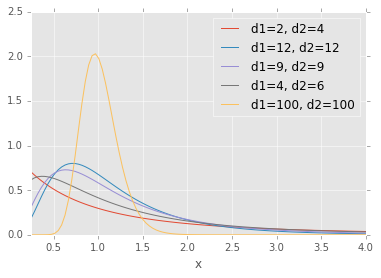

In [4]:
data_df.set_index('x').plot()

The assumptions for a one-way ANOVA are:

* Samples are independent
* The response variable is approximately normally distributed
* The population variances are equal across responses for the group levels (if the largest sample standard deviation divided by the smallest sample standard deviation is not greater than two, then assume that the population variances are equal). 

Given that we are comparing k independent groups, the null and alternative hypotheses are:

$H_0$: $\mu_1 = \mu_2 = \cdots = \mu_k$

$H_{alt}$: Not all $\mu_i$ are equal

In other words, the null hypothesis is that at all of the groups' population means are equal.  The alternative is that they are not all equal; there are at two population means that are not equal to one another. 

The test statistic is 

$F = \dfrac {\text {between group variability}} {\text {within group variability}}$

<img src="ss_anova.JPG" />

Where,

k = Number of groups

n = Total sample size (all groups combined)

$n_k$ = Sample size of group k

$\bar {x_k}$ = Sample mean of group k

$\bar {x}$ = Grand mean (i.e., mean for all groups combined)

SS = Sum of squares

MS = Mean square

df = Degrees of freedom

F = F-ratio (the test statistic)

If the p value is less than the desired significance level, then we will reject the null hypothesis, i.e. the means are different.

# Example

In this example, we'll look at the well known Diet Dataset.

In [5]:
diet_url = 'https://www.sheffield.ac.uk/polopoly_fs/1.570199!/file/stcp-Rdataset-Diet.csv'
diet_df = pd.read_csv(diet_url)

In [6]:
diet_df.head()

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3


First we calculate the weight lost by each person under study.

In [7]:
diet_df = diet_df.assign(weight_lost=diet_df['pre.weight'] - diet_df.weight6weeks)

In [8]:
weight_lost = diet_df.loc[:, ['Diet', 'weight_lost']]

# Number of Observations per Group

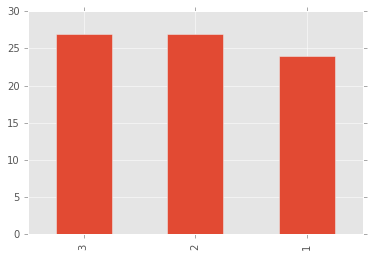

In [9]:
weight_lost.Diet.value_counts().plot(kind='bar')

# Spread of weight_lost Across Different Groups

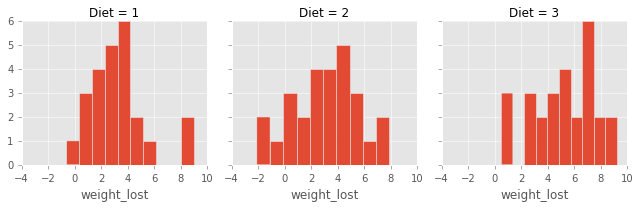

In [10]:
import seaborn as sns
fg = sns.FacetGrid(data=weight_lost, col='Diet')
fg = fg.map(pylab.hist, 'weight_lost')

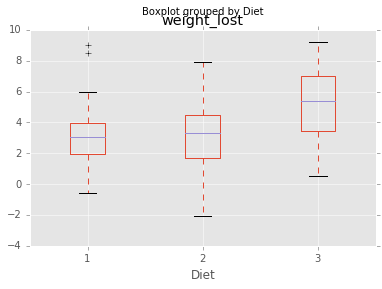

In [11]:
weight_lost.boxplot(column='weight_lost', by='Diet')

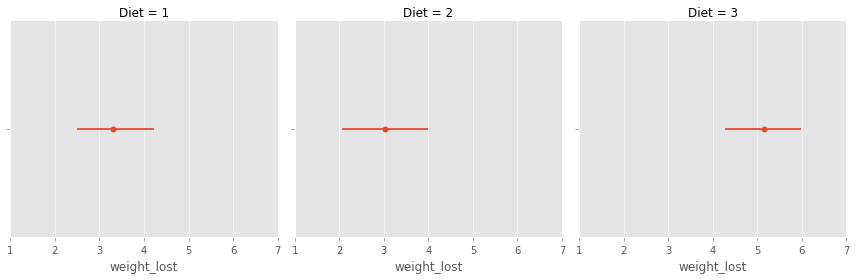

In [12]:
sns.factorplot(x='weight_lost', col='Diet', data=weight_lost)

# Calculate the F-statistic and the Corresponding p-value

In [13]:
total_mean = weight_lost.weight_lost.mean()
total_std = weight_lost.weight_lost.std()

In [14]:
group_means = weight_lost.groupby(by='Diet')['weight_lost'].mean()

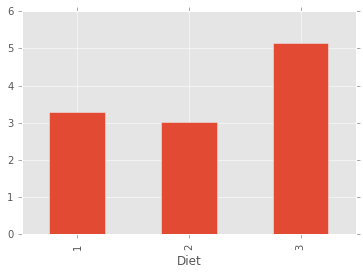

In [15]:
group_means.plot(kind='bar')

In [16]:
group_counts = weight_lost.Diet.value_counts()

## MS_Between

In [17]:
SS_between = group_means.sub(total_mean).pow(2.0).mul(group_counts).sum()

In [18]:
SS_between

71.09368945868938

In [19]:
MS_between = SS_between / (len(group_counts) - 1)

In [20]:
MS_between

35.54684472934469

## MS_Within

In [21]:
groups = weight_lost.groupby('Diet')['weight_lost'].groups

SS_within = 0

for k, v in groups.items():
    SS_in_group = weight_lost.loc[v, 'weight_lost'].sub(group_means[k]).pow(2.0).sum()
    SS_within += SS_in_group

In [22]:
SS_within

430.1792592592591

In [23]:
MS_within = SS_within / (len(weight_lost) - len(groups))

In [24]:
MS_within

5.735723456790121

## F-Statistics

In [25]:
f_stat = MS_between / MS_within
f_stat

6.197447453165349

## Calculate the p-value

In [26]:
n = len(weight_lost)
k = len(groups)

d1, d2 = k-1, n-k

In [27]:
d1, d2

(2, 75)

In [28]:
p_val = f.sf(f_stat, d1, d2)

In [29]:
p_val

0.0032290142385893524

Set significance level = 0.05. Since the p_value is < 0.05, we reject the null hypothesis, i.e. we conclude that the mean of at least one of the diets are different than the other two.